In [ ]:
device_name = "culs"    
#type "colab" for google colab version
#type "culs" for AI laboratory

In [ ]:
if(device_name == "culs"):
    print("Czech University of Life Sciences AI Laboratory")
    project_dir = "C:/Users/cejkamartin/OneDrive - CZU v Praze/Dokumenty/rcnn_cuneiform/"
    models_dir  = os.path.join(project_dir, 'models', 'Resnet')
    data_dir    = os.path.join(project_dir, 'data', 'Resnet')
    results_dir = os.path.join(project_dir, 'results', 'Resnet')
    iterate    = 612
if(device_name == "colab"):
    print("Google Colab environment")
    from google.colab import drive
    drive.mount('/content/gdrive/')
    !pip install detecto
    models_dir  = '/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Neural_Networks/ResNet'
    data_dir    = '/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/sources/tablet_figure_cut_final/'
    results_dir = '/content/gdrive/MyDrive/Projekty/UGS_Klinove_pismo/Data/predictions/detecto_figure_cut/'
    from google.colab.patches import cv2_imshow
    iterate = 629

Czech University of Life Sciences AI Laboratory


In [ ]:
#Detecto - An object detection library for PyTorch
from detecto.core import Model  
labels = ['hstroke']
os.chdir(models_dir)
model = Model.load('Resnet_weights_50epoch.pth', labels)

In [ ]:
import os
tp = os.path.abspath(os.path.join(data_dir))

In [ ]:
from detecto.core import Dataset
test_set = Dataset(tp)

In [ ]:
print(len(test_set))
print(test_set)

339


In [ ]:
from os import listdir
listdir(tp)

In [ ]:
pth = tp + '/IMG-129.png'
print(pth)

C:\Users\cejkamartin\OneDrive - CZU v Praze\Dokumenty\rcnn_cuneiform\data\Resnet/IMG-129.png


In [ ]:
from detecto.utils import read_image
img = read_image(pth)

In [ ]:
labels, boxes, scores = model.predict(img)

In [ ]:
import detecto.visualize
from detecto.visualize import show_labeled_image

In [ ]:
#from google.colab.patches import cv2_imshow
import cv2
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import torch
from detecto.utils import reverse_normalize, normalize_transform, _is_iterable
from torchvision import transforms

os.chdir(results_dir)
name="default.png"

def ukaz(image, boxes, labels=None):  
  fig, ax = plt.subplots(1)
  # If the image is already a tensor, convert it back to a PILImage
  # and reverse normalize it
  if isinstance(image, torch.Tensor):
      image = reverse_normalize(image)
      image = transforms.ToPILImage()(image)
  ax.imshow(image)


  # Show a single box or multiple if provided
  if boxes.ndim == 1:
      boxes = boxes.view(1, 4)

  if labels is not None and not _is_iterable(labels):
      labels = [labels]

  # Plot each box
  for i in range(boxes.shape[0]):
      box = boxes[i]
      width, height = (box[2] - box[0]).item(), (box[3] - box[1]).item()
      initial_pos = (box[0].item(), box[1].item())
      rect = patches.Rectangle(initial_pos,  width, height, linewidth=1,
                                 edgecolor='r', facecolor='none')
  #pridat ukladani souradnic box [0-3] do XML souboru!!

  
     # if labels:
     #     ax.text(box[0] + 5, box[1] - 5, '{}'.format(labels[i]), color='red')

      ax.add_patch(rect)
  #ax.imshow(image)
  plt.axis('off')
  #plt.show()
  plt.savefig(name, bbox_inches="tight", pad_inches=0)
  


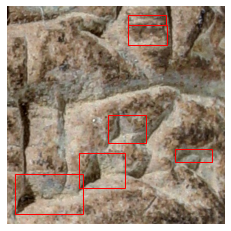

In [ ]:
ukaz(img, boxes, labels)

In [ ]:
print(len(labels))

6


In [ ]:
import glob
images = glob.glob(tp + '/*.png')
print (images)

In [ ]:
ims = [] 
print(len(images))

630


In [ ]:
for i in range (0,iterate):
  ims.append(read_image(images[i]))

In [ ]:
labelsimg = []
boxesimg = []
scoresimg = [] 

In [ ]:
labels_detected = 0
os.chdir(results_dir)
for j in range (0,iterate):
  labels, boxes, scores = model.predict(ims[j])
  name_png  = images[j] + "_pred.png"
  name_xml  = images[j] + "_pred.xml"
  ukaz(ims[j], boxes, labels)
  labels_detected = labels_detected + len(labels)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from detecto import visualize
#visualize.plot_prediction_grid(model, ims, figsize=(200,200), dim=(41,2))
visualize.plot_prediction_grid(model, ims, figsize=(416,416), dim=(35,18))